In [1]:
import pickle
import glob
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
infos = []
idx_tups = []

# for file in glob.glob("../../data/purchase/purchase_std*"): for old purchase data
for file in glob.glob("../../data/purchase/purchase_u*"):
    fd = pickle.load(open(file, 'rb'))
    #print(file, type(infos[-1]))
    var = file.split("_")[-5:]
    print(var)
    a, y, m = max([(a, yt - yf, mt  - mf) for a, yt, yf, mt, mf in zip(fd['acc'], fd['yeom_tpr'], fd['yeom_fpr'], fd['merlin_tpr'], fd['merlin_fpr'])])
    fd['acc'] = a
    fd['adv'] = y
    fd['merlin_adv'] = m
    if var[-5] == 'ub':
        var[-5] = 'dp'
    else:
        var[-5] = 'std'
    var[-4] = int(var[-4])
    var[-1] = int(var[-1].split(".")[0])
    var[-3] = int(var[-3])
    var[-2] = float(var[-2]) if var[-2] != 'False' else False
    # IDX tups follow the format (epsilon, throw out threshold, batch size)
    idx_tups.append(var)
    infos.append(fd)
for file in glob.glob("../../data/purchase/purchase_s_*"):
    fd = pickle.load(open(file, 'rb'))
    #print(file, type(infos[-1]))
    var = file.split("_")[-5:]
    print(var)
    a, y, m = max([(a, yt - yf, mt  - mf) for a, yt, yf, mt, mf in zip(fd['acc'], fd['yeom_tpr'], fd['yeom_fpr'], fd['merlin_tpr'], fd['merlin_fpr'])])
    fd['acc'] = a
    fd['adv'] = y
    fd['merlin_adv'] = m
    if var[-5] == 'ub':
        var[-5] = 'dp'
    else:
        var[-5] = 'std'
    var[-4] = int(var[-4])
    var[-1] = int(var[-1].split(".")[0])
    var[-3] = int(var[-3])
    var[-2] = float(var[-2]) if var[-2] != 'False' else False
    # IDX tups follow the format (epsilon, throw out threshold, batch size)
    idx_tups.append(var)
    infos.append(fd)

['ub', '256', '1000', '5', '64.b']
['ub', '256', '10000', '0.5', '64.b']
['ub', '256', '100000', '0.5', '64.b']
['ub', '256', '1000000', '1', '64.b']
['ub', '256', '100000', '0.1', '64.b']
['ub', '256', '100000', '1', '64.b']
['ub', '256', '10000', '5', '64.b']
['ub', '256', '100000', '5', '64.b']
['ub', '256', '10000', '1', '64.b']
['ub', '256', '1000000', '0.5', '64.b']
['ub', '256', '1000', '0.5', '64.b']
['ub', '256', '1000000', '0.1', '64.b']
['ub', '256', '1000000', '5', '64.b']
['ub', '256', '10000', '0.1', '64.b']
['ub', '256', '1000', '1', '64.b']
['ub', '256', '1000', '0.1', '64.b']
['s', '256', '10000', '1.5', '64.b']
['s', '256', '500', '1', '64.b']
['s', '256', '100000', '1.5', '64.b']
['s', '256', '100000', '1', '64.b']
['s', '256', '50000', '5', '64.b']
['s', '256', '500', '1.5', '64.b']
['s', '256', '100', '5', '64.b']
['s', '256', '100', '10', '64.b']
['s', '256', '100000', '2', '64.b']
['s', '256', '1000', '5', '64.b']
['s', '256', '1000', '1.5', '64.b']
['s', '256', 

In [3]:
inf_scalars = [(i[0]['acc'], i[0]['adv'][-1] if type(i[0]['adv']) == list else i[0]['adv'],  i[0]['merlin_adv'][-1][0] if type(i[0]['merlin_adv']) == list else i[0]['merlin_adv'], *i[1]) for i in zip(infos, idx_tups)]
ds = pd.DataFrame(inf_scalars)
ds.columns = ['acc', 'yeom', 'merlin', 'method','width', 'epsilon', 'throw out', 'batch_size']

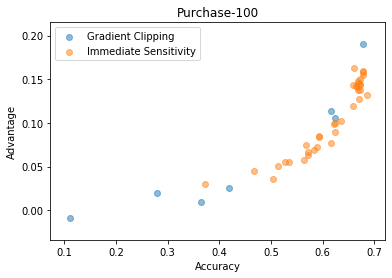

In [16]:
dp = ds[(ds['method'] == 'dp') & (ds['acc'] > .1)].sort_values('acc')
sd = ds[(ds['method'] == 'std') & (ds['acc'] > .1)].sort_values('acc')
plt.scatter(dp['acc'], dp['yeom'],label='Gradient Clipping', alpha=.5)
plt.scatter(sd['acc'], sd['yeom'],c='tab:orange', label='Immediate Sensitivity', alpha=.5)
plt.xlabel('Accuracy')
plt.ylabel('Advantage')
plt.title('Purchase-100')
plt.legend()

In [19]:
ds[ds['method'] == 'std'].sort_values('acc', ascending=False)

,acc,yeom,merlin,method,width,epsilon,throw out,batch_size
31,0.686198,0.132118,0.068750,std,256,10000,10.0,64
41,0.679036,0.158539,0.067969,std,256,50000,1.5,64
43,0.678060,0.159754,0.082031,std,256,100000,5.0,64
48,0.677409,0.154632,0.032031,std,256,50000,10.0,64
20,0.673177,0.142820,0.040625,std,256,50000,5.0,64
24,0.672852,0.145055,0.056250,std,256,100000,2.0,64
32,0.672526,0.150609,0.046875,std,256,50000,1.0,64
47,0.672201,0.137111,0.028125,std,256,100000,0.0,64
46,0.670573,0.127440,0.047656,std,256,10000,5.0,64
45,0.668945,0.138185,0.090625,std,256,100000,10.0,64


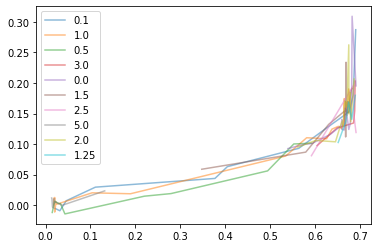

In [8]:
throws = ds['throw out'].unique()
for t in throws:
    db = ds[ds['throw out'] == t].sort_values('acc')
    plt.plot(db['acc'], db['yeom'],alpha=.5, label=f'{t}')
plt.legend()

In [9]:
da = ds[ds['acc'] > .65]
da.sort_values('yeom')

,acc,yeom,merlin,method,width,epsilon,throw out,batch_size
54,0.651693,0.102620,0.055469,std,256,1000,1.25,64
12,0.668294,0.111684,0.039062,std,256,10000,1.50,64
30,0.691406,0.118969,0.019531,std,256,10000,2.50,64
85,0.665365,0.123127,0.050781,std,256,50000,0.00,64
68,0.675258,0.123932,0.059375,std,256,50000,0.00,32
...,...,...,...,...,...,...,...,...
70,0.687174,0.206420,0.057813,std,256,100000,2.00,64
13,0.669137,0.233864,0.106250,std,256,0,1.50,32
37,0.675258,0.262427,0.076563,std,256,0,2.00,32
22,0.690722,0.287191,0.117188,dp,256,1000000,0.10,32


In [6]:
import torchvision.datasets as datasets
import torchvision
from torch.utils.data import DataLoader


cifar_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor()) #target_transform=one_hot_label)
cifar_testset = datasets.MNIST(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())

In [2]:
from sklearn.model_selection import train_test_split

In [12]:
_, training = train_test_split(cifar_trainset,test_size=.18, shuffle=True)

In [4]:
#training, testing = train_test_split(training, test_size=.3, shuffle=True)

In [8]:
train_loader = DataLoader(training, batch_size=64, shuffle=True, drop_last=True)

In [13]:
len(training)

10800